### 데이터프레임의 결합
    1. 단순한 데이터의 결합(유니언결합) : '+'
        - concat( [{데이터프레임1, 데이터프레임2, .......}], axis={0|1} )
        - 단순하게 행을 결합 (같은 형태의 데이터프레임을 결합)
    2. 특정 조건에 맞춰서 데이터를 결합(조인결합)
        - 2개의 데이터프레임을 열을 결합 (특정한 조건이 참인 경우)
        - merge({데이터프레임1},{데이터프레임2}, on = {조건}, how = {결합방식})

In [206]:
import pandas as pd

In [207]:
# 데이터프레임 생성
df = pd.DataFrame(
    {
        'id' : ['test1','test2','test3'],
        'name' : ['kim','park','lee'] 
    }
)
df2 = pd.DataFrame(
    {
        'id' : ['test1','test3','test2'],
        'item' : ['a','b','c'] 
    }
)

In [208]:
# 단순한 데이터프레임의 행 결합
pd.concat([df,df2], axis=0, ignore_index=True)

,id,name,item
0,test1,kim,NaN
1,test2,park,NaN
2,test3,lee,NaN
3,test1,NaN,a
4,test3,NaN,b
5,test2,NaN,c


In [209]:
# 단순한 데이터프레임의 열 결합 -> ignore_index=True 사용시 column의 이름을 인덱스로 변경해주기 때문에 거의 사용X
pd.concat([df,df2], axis=1)

,id,name,id,item
0,test1,kim,test1,a
1,test2,park,test3,b
2,test3,lee,test2,c


In [210]:
# 조인결합 : 특정한 조건에 맞춰서 열 결합
df3 = pd.merge(df,df2, on='id', how='left')

In [211]:
item_info = pd.DataFrame(
    {
        'item' : ['a','b','d'],
        'price' : [100,200,300] 
    }
)

In [212]:
# pd.merge(df3,item_info, on='item', how='left')
# pd.merge(df3,item_info, on='item', how='right')
# pd.merge(df3,item_info, on='item', how='inner')
pd.merge(df3,item_info, on='item', how='outer')

,id,name,item,price
0,test1,kim,a,100.0
1,test2,park,c,NaN
2,test3,lee,b,200.0
3,NaN,NaN,d,300.0


In [213]:
# pd.merge(df3,item_info, left_on='item', right_on='item_name' how='outer') -> 비교할 두 컬럼의 이름이 다른경우 조건절을 각각 왼쪽 오른쪽 나눠서 결합 가능

# 문제
    1. csv폴더에 있는 tran_1.csv, tran_2.csv 파일 로드
    2. 단순한 행 결합을 이용하여 tran_1, tran_2 결합
    3. csv 폴더에 있는 tran_d_1.csv, tran_d_2.csv 파일 로드
    4. 단순한 행 결합을 이용하여 tran_d_1, tran_d_2 결합
    5. 2번과정에서 나온 데이터프레임과 4번 과정에서 나온 데이터프레임 특정한 조건에 맞춰서 열 결합
    6. csv 폴더에 있는 item_master.csv 파일 로드
    7. 5번 과정에서 나온 데이터프레임과 item_master를 특정한 조건에 맞춰서 열 결합

In [214]:
tran_1 = pd.read_csv("./csv/tran_1.csv")
tran_2 = pd.read_csv("./csv/tran_2.csv")
tran_d_1 = pd.read_csv("./csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("./csv/tran_d_2.csv")
item_master = pd.read_csv("./csv/item_master.csv")

In [215]:
tran = pd.concat([tran_1,tran_2],axis=0, ignore_index=True)
tran

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [216]:
tran_d = pd.concat([tran_d_1,tran_d_2],axis=0, ignore_index=True)
tran_d

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [217]:
total_tran = pd.merge(tran,tran_d, on='transaction_id', how='left')
total_tran

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [218]:
result_tran = pd.merge(total_tran,item_master, on='item_id', how='left')
result_tran

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000
...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,PC-D,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,PC-B,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,PC-A,50000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,PC-B,85000


1. payment_date 컬럼의 데이터를 시계열 변경
2. 파생변수  payment_month 시계열 데이터에서 월을 추출
3. 월별 그룹화 price 합계 출력
4. 그래프 시각화

In [219]:
# 데이터를 시계열 데이터로 변환
result_tran['payment_date'] = pd.to_datetime(result_tran['payment_date'], format='%Y-%m-%d %H:%M:%S')

In [220]:
# 시계열 데이터에서 '년-월' 데이터를 추출하여 새로운 퍼샹변수에 대입
result_tran['payment_month'] = result_tran['payment_date'].dt.strftime('%Y-%m')
result_tran.head(3)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,2019-02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,2019-02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,2019-02


In [223]:
# payment_month를 기준으로 그룹화 price 합계라는 그룹화 연산
group_data = result_tran[['payment_month','price']].groupby(['payment_month']).sum()

In [224]:
import matplotlib.pyplot as plt

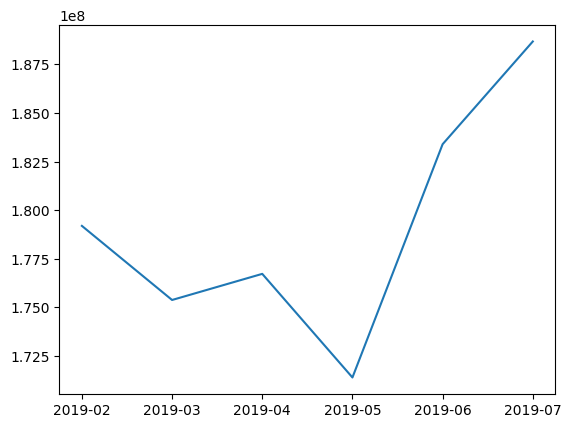

In [226]:
# x = group_data.index
y = group_data['price']

# plt.plot(x,y)
plt.plot(y)
plt.show()

<Axes: xlabel='payment_month'>

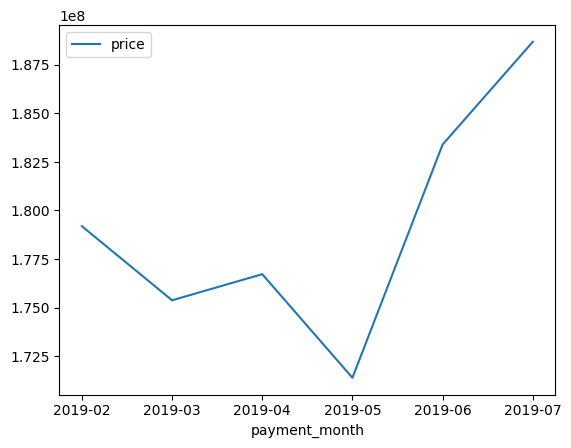

In [227]:
group_data.plot()